In [1]:
%matplotlib inline

import pandas as pd
import sys

sys.path.insert(0, "../../base_codes")
sys.path.insert(0, "../../data_specific_codes")
sys.path.insert(0, "../../utility_codes")

from RE_init import *
from utility_functions import *
from main_functions import *
from SDDb_utility_functions import *

%reload_ext autoreload
%autoreload 2


based_dir = ''

file_input_name = "SDDb_car_manual_reading.xlsx"
file_input = based_dir + file_input_name

DATA_SET = 'sddb-car'

df = pd.read_excel(file_input,sheetname="SDDb_car",header=0)

/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
ls

Car_Dreams/
Entity_detection_and_clustering.ipynb*
Evaluation_on_manually_tagged_dreams.ipynb*
Robot_Dreams/
SDDb_all_clean.csv
SDDb_car_filter(car)_relations_-1.xlsx
SDDb_car_filter(car)_relations_-1.xlsx (1).gsheet
SDDb_car_filter(car)_relations_-1.xlsx.gsheet
SDDb_car_filter(car)_rels_aggregated.csv
SDDb_car_filter(car)_subjobj_entity_rankings.csv
SDDb_car_manual_reading - Copy.xlsx
SDDb_car_manual_reading.xlsx
SDDb_car_relations_-1.csv
SDDb_car_subjobj_entity_rankings.csv
SDDb_utility_functions.py*
SDDb_utility_functions.pyc*
SSDb_car.csv
SSDb_car.csv.gsheet
Sleep_and_Dream_Database_All_Results.csv
Sleep_and_Dream_Database_All_Results.csv.gsheet
Sleep_and_Dream_Database_All_Results.html
Untitled.ipynb*
__init__.py*
crawl_html_text_to_csv.ipynb*
data.pickle*
dream_reports_clustering.ipynb*
excluding_one_mention_cars.ipynb*
topic_modeling.ipynb*
ward_clusters.png*
~$SDDb_car_manual_reading.xlsx


In [2]:
df

,index,person id,answer date,annotation of situation,salient phrases are marked bold,"sentiment (-2, -1, 0, 1, 2)",comment,non car dreams annotations,title,text
0,10,mike_journal:mike,1978-02-20 00:00:00,NaN,NaN,NaN,not car related,NaN,Dream Text: Most Recent Dream - Q15,011 We are on the same fire base as the one es...
1,23,mike_journal:mike,1981-03-01 00:00:00,STOPPING A CAR,NaN,-1.0,NaN,NaN,Dream Text: Most Recent Dream - Q15,"024 I am back in Vietnam, We are on patrol. Bo..."
2,24,mike_journal:mike,1981-03-02 00:00:00,FIGHT IN A CAR,NaN,-2.0,NaN,NaN,Dream Text: Most Recent Dream - Q15,025 I am trying to squeeze into a small Englis...
3,28,mike_journal:mike,1981-07-01 00:00:00,ECAPING BY CAR,NaN,-2.0,NaN,NaN,Dream Text: Most Recent Dream - Q15,029 I am in a place that resembles Viet Nam. I...
4,54,brianna1:brianna,1985-06-06 00:00:00,ACCIDENT / DROWINING WHILE IN THE CAR / CAR TU...,NaN,0.0,NaN,NaN,Dream Text: Last Night's Dream - last_nights_d...,"Big blue car. part like Ahron's, part like Har..."
5,70,brianna1:brianna,1985-06-10 00:00:00,CAR ACCIDENT / HARRASMENT,NaN,-2.0,NaN,NaN,Dream Text: Last Night's Dream - last_nights_d...,Car accident. I'm investigating it. I go to Ch...
6,78,brianna1:brianna,1985-08-01 00:00:00,CONFESSING LOVE IN THE CAR / BONDING,NaN,2.0,NaN,NaN,Dream Text: Last Night's Dream - last_nights_d...,The Baumberg family were dressed in red overal...
7,124,brianna1:brianna,1986-01-22 00:00:00,BONDING,NaN,1.0,NaN,NaN,Dream Text: Last Night's Dream - last_nights_d...,I was at a pool like the one at Poinciana in F...
8,132,brianna1:brianna,1986-03-07 00:00:00,CAR ACCIDENT,NaN,-1.0,NaN,NaN,Dream Text: Last Night's Dream - last_nights_d...,Jerusalem. Irit. Old City. walking. Snow. snow...
9,157,brianna1:brianna,1986-04-13 00:00:00,NO CARS STOPPING WHEN NEEDED,NaN,-2.0,peripheral role of the car!,NaN,Dream Text: Last Night's Dream - last_nights_d...,2. Mark had been involved in some scandal asso...


In [3]:
list(df)

[u'index',
 u'person id',
 u'answer date',
 u'annotation of situation ',
 u'salient phrases are marked bold',
 u'sentiment (-2, -1, 0, 1, 2)',
 u'comment',
 u'non car dreams annotations',
 u'title',
 u'text']

In [2]:
column_name = "annotation of situation "#"comment"
print df[column_name]
filtered_df = df[df[column_name].notnull()]
a = filtered_df[column_name].value_counts()

0                                                     NaN
1                                          STOPPING A CAR
2                                          FIGHT IN A CAR
3                                          ECAPING BY CAR
4       ACCIDENT / DROWINING WHILE IN THE CAR / CAR TU...
5                               CAR ACCIDENT / HARRASMENT
6                    CONFESSING LOVE IN THE CAR / BONDING
7                                                 BONDING
8                                            CAR ACCIDENT
9                            NO CARS STOPPING WHEN NEEDED
10                               NEAR ACCIDENT / RESCUING
11                         BONDING / CONVERSATION/ INSULT
12                                                 THREAT
13                               NEAR ACCIDENT / RESCUING
14                               NEAR ACCIDENT / RESCUING
15                               BEING KIDNAPPED / THREAT
16                                HAVING MONEY IN THE CAR
17            

In [3]:
#a.to_csv(based_dir+"histogram_annotation_of_situation.csv")

In [17]:
filtered_df["text"][2]

u"025 I am trying to squeeze into a small English sports car. It keeps moving and I say, Fuck You to the driver. He returns and challenges me to a fight. We are in the garage of Bob's parents. I am full of confidence and cunning. Outmaneuvering the other fellow, I stab him in the back with a knife and say, Give up or I'll kill you. He yields and I help him outside and dress his wounds."

In [5]:
filtered_df["sentiment (-2, -1, 0, 1, 2)"].value_counts()

 0.0    68
-1.0    49
-2.0    25
 1.0     6
 2.0     6
Name: sentiment (-2, -1, 0, 1, 2), dtype: int64

<Container object of 5 artists>

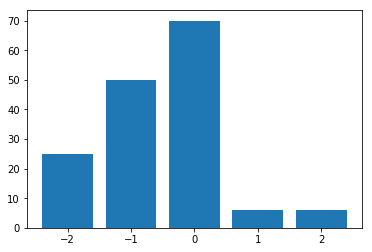

In [6]:
x = [-2, -1 , 0 , 1 , 2]
y = [25, 50, 70, 6, 6]
plt.bar(x,y)

In [7]:
a

DRIVING WITH SOMEONE                                                                                     7
BONDING / HAVING A CONVERSATION IN THE CAR                                                               4
NEAR ACCIDENT / RESCUING                                                                                 3
BONDING                                                                                                  2
BONDING / SEXUAL AFFAIR                                                                                  2
ACCIDENT / FATAL                                                                                         2
CAR ACCIDENT                                                                                             2
CAR ACCIDENT / NON FATAL                                                                                 2
ACCIDENT                                                                                                 2
DRIVING                              

In [8]:
for ind, i in enumerate(a):
    if ind > 100:
        break
    if i == np.nan(dtype=np.float64()):        
        print i, type(i)


TypeError: 'float' object is not callable

In [14]:
a = filtered_df["sentiment"].tolist()
#a = a[np.logical_not(np.isnan(a))]
a = [x for x in a if x != "nan"]
print a

import matplotlib.pyplot as plt
#plt.hist(np.array(a))
#plt.hist(np.array())
#plt.show()

KeyError: 'sentiment'

In [9]:
np.isnan(a)

DRIVING WITH SOMEONE                                                                                     False
BONDING / HAVING A CONVERSATION IN THE CAR                                                               False
NEAR ACCIDENT / RESCUING                                                                                 False
BONDING                                                                                                  False
BONDING / SEXUAL AFFAIR                                                                                  False
ACCIDENT / FATAL                                                                                         False
CAR ACCIDENT                                                                                             False
CAR ACCIDENT / NON FATAL                                                                                 False
ACCIDENT                                                                                                 False
D

In [10]:
len(filtered_df["comment"])

179

In [11]:
# encoding: utf-8
import codecs
import bs4
from bs4 import BeautifulSoup
import re
import sys
import time
import pandas as pd
from unidecode import unidecode
from nltk import sent_tokenize

sys.path.insert(0, '../../base_codes')
sys.path.insert(0, '../../data_specific_codes')
sys.path.insert(0, '../../utility_codes')

from RE_init import *
from main_functions import *
from utility_functions import *
from SDDb_utility_functions import *

stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

%reload_ext autoreload
%autoreload 2


based_dir = ''
file_input_name = 'Sleep_and_Dream_Database_All_Results.html'
file_input = based_dir + file_input_name    

f=codecs.open(file_input, 'r', encoding='utf-8')#'iso-8859-1')#'utf-8')
html = f.read()
start_time = time.time()
parsed_html = BeautifulSoup(html)
print "Execution Time: ", time.time()-start_time, " seconds."
start_time = time.time()
count = 0
list_final_res = []
html_search_results = parsed_html.body.find('ul', attrs={'class':'list_result word-search'})
for ind, item in enumerate(html_search_results.find_all('li')):
    dream_text = item.find('div', attrs={'class':'searchhittext'}).text.strip(' \t\n\r').decode('utf-8')
    dream_text = re.sub(u"(\u2018|\u2019|\u201c|\u201d|\u0060|\u00b4)", "'", dream_text)
    dream_text = dream_text.encode('ascii', 'ignore')
    dream_title = item.find('strong').text
    dream_header_text = item.find('div', attrs={'class':'searchhitheader'}).text
    dream_header_text = dream_header_text.decode('utf-8').encode('ascii', 'ignore')
    dream_date = re.findall(r'\[(.*?)\]', dream_header_text)[0]
    dream_person_id = item.find('a', attrs={'class':'list_result_anchor'}).text
    list_final_res.append([ind, dream_person_id, dream_date, dream_title, dream_text])
    count += 1
print count
print "Execution Time: ", time.time()-start_time
df_texts = pd.DataFrame(list_final_res, columns = ["index", "person id", "answer date", "title", "text"])
print "total number of raw dream reports: ", len(df_texts)

Execution Time:  102.152253866  seconds.
40435
Execution Time:  26.2722718716
total number of raw dream reports:  40435


In [12]:
df_texts.drop_duplicates(subset=["text"], inplace=True)
start_time = time.time()
for ind, row in df_texts.iterrows():
    post = row["text"]
    num_sentences = len(sent_tokenize(post))    
    post_clean = clean_sent(post)
    if num_sentences == 1 and has_dot_issue(post_clean):
        post_clean = fix_dot_issue(post_clean)
    df_texts.set_value(ind,'text',post_clean)
print "Execution Time: ", time.time()-start_time, " seconds."    
df_texts.to_csv(based_dir + 'SDDb_all_clean.csv',  index = False, encoding='ascii')
print "total number of dream reports after removing duplicates: ", len(df_texts)

Execution Time:  79.9014120102  seconds.
total number of dream reports after removing duplicates:  33453


In [18]:
ground_truth=filtered_df["text"]
print len(ground_truth)

179


In [47]:
df_texts['text'][19]

'020 I am with my old unit in Vietnam. The order comes over the radio that we are now finished with jungle patrols. The Lieutenant makes it official and we silently begin to disband. Suddenly, a civilian, an older man in a suit, emerges from a tent. He speaks to us. If my son cannot go, no one goes. Then he shoots and kills my good friend Jerry Bieck. I am overwhelmed and unload several shots at him. Nothing happens. Then, with an unusually long burst of automatic from my M. 16 I cut him down. As the others have walked off, I throw the gun down and follow after them. There is a feeling of complete freedom. In very high spirits Jim Lamb and I go to a supermarket and buy food. I am aware that I do not wear my steel helmet. The dream is repeated. This time I do the killing with a laser beam. The man is this time Parrish, a medic from another company I did not like. He dies a slow and agonizing death.'

In [9]:
train2=[]
label=[]
for index,row in filtered_df.iterrows():
    if "ACCIDENT" in row['annotation of situation ']:
        train2.append(row['text'])
        label.append(1)


In [11]:
for i in train2:
    print "=========================="
    print i

Big blue car. part like Ahron's, part like Harold's. I get to borrow it. and I'm on lakefront where I was in real life with Chuck. water comes up and over the car. car is in water. I am holding on to it. someone swims out to save me because he thinks I will drownsink by holding on to the car. but we just float along car and I and suddenly the car turns into a blue towel small. It is like one of those sponges that shrink down when not in use. Then I and towel land on shore. There is a little boy there. about age 4. who is delighted to see that when we put towel on the sand, it slowly grows back into a big blue car. like magic! Before this, some people were asking me about how much Gaetha's husband makes e. g. Harold. people from the Wakefield, R. I. town council voting. and I told them he's a professor at a college but that he makes most of his money from mgmnt. consulting. They looked very skeptical as if he made too much. Then I was with the Dynamy kids in their apartment and we were 

In [ ]:
test=[]
number=0

number=0
for index, row in df_texts.iterrows():
    if number<20:
        number=number+1
        label.append(0)
#         train.append(row["text"])
        train.append(df_texts['text'][index])
    elif number<len(test):
        number=number+1
#         test.append(row["text"])
        test.append(df_texts['text'][index])
    else:
        break

In [87]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
import nltk
import re
import string
stop_words = text.ENGLISH_STOP_WORDS
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # what kind of stemming algorithm to use?

import re
vectorizer = CountVectorizer(stop_words=stop_words)



In [61]:
X_train_counts = vectorizer.fit_transform(train)

In [62]:
X_train_counts.shape

(300, 6223)

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [67]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [68]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, label)

In [70]:
X_new_counts = vectorizer.transform(test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)

In [73]:
print predicted

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
print test

[u"120 Last night I had kind of an interesting dream. I dreamt that Dad and I were on this car trip and we had the Peavey system that for some reason I had the notion that the Peavey system just kind of like stayed in the car like a thing along the way in case we need it, and it was there and we took it out. We went out in this back woods campsite area and we set up and we were testing it out. And I was mostly, I was standing like about two or three feet away with the wireless microphone and talking while Dad made some adjustments and some checks and some tests at the board. And then I was going to sing something but we really did not have time. We had to pack up and continue on the journey home. And as we were taking down the Peavey system and putting it away, it was getting really dark and we built a campfire. And I dreamt that Dad told me he planned to bring me there for my birthday, and he said, 'I've been checking out your equipment' and I was like, 'Why?' And, 'Well, I want you t